In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data= pd.read_csv('Raw_Housing_Prices3.csv')


In [5]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [9]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19485
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (i

In [12]:
data1 = data.dropna(axis = 1)

In [14]:
data1.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

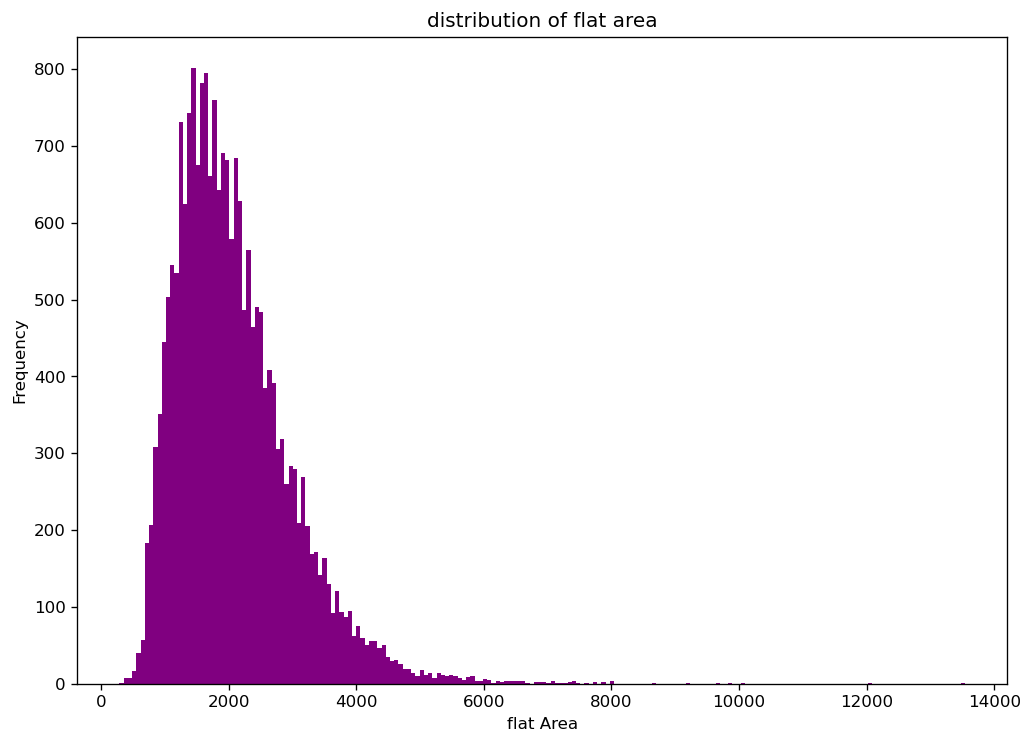

In [22]:
'''checking skewness of flat area  frequency and transforming the flat area to get normal distribution''' 

plt.figure(figsize =(10,7),dpi = 120)
plt.hist(data['Flat Area (in Sqft)'],bins = 200,color ='purple')
plt.xlabel('flat Area')

plt.ylabel('Frequency')
plt.title('distribution of flat area')
plt.show()

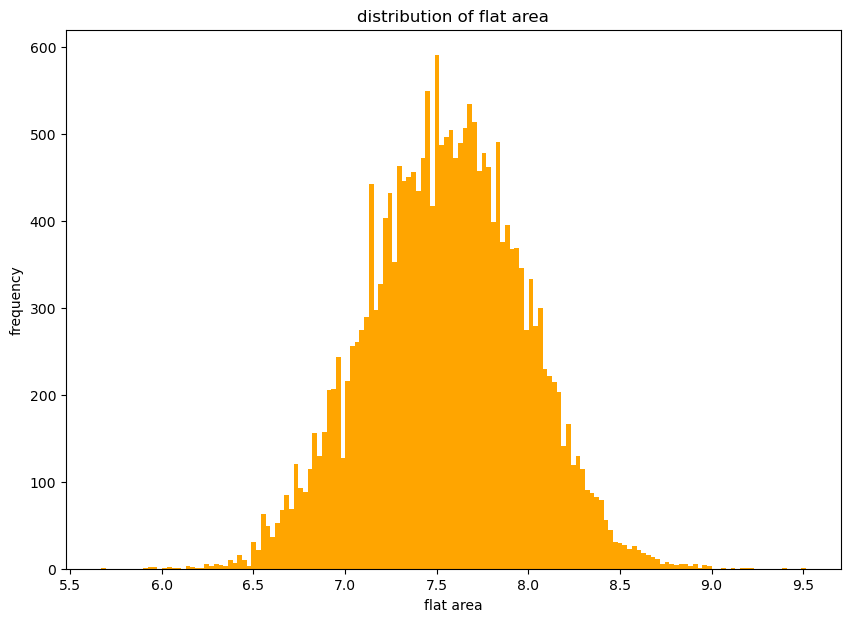

In [26]:
def log_transform(sample_data):
    return np.log(sample_data)


data['Transformed flat area'] = data['Flat Area (in Sqft)'].map(log_transform)
plt.figure(figsize = (10,7),dpi = 100)
plt.hist(data['Transformed flat area'],bins =150,color='orange')
plt.xlabel('flat area')
plt.ylabel('frequency')
plt.title('distribution of flat area')
plt.show()

# label encoding 

In [47]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

In [48]:
label_encoded = label_encoded.map({
                  'Bad':1,
                  'Okay':2,
                  'Good':4,
                  'Fair':3,
                  'Excellent':5
    
                    })
label_encoded.value_counts()

Condition of the House
3    14028
4     5678
5     1701
2      172
1       30
Name: count, dtype: int64

NameError: name 'heloo' is not defined

# BINNING :

In [50]:
J

NameError: name 'J' is not defined

# Feature Extraction:

In [55]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data['month_sold'] = time.month
#data['weekday_sold'] = time.weekday_name
data['date_sold'] = time.days_in_month

data[['year_sold','month_sold','date_sold']].head()

,year_sold,month_sold,date_sold
0,2017,10,31
1,2017,12,31
2,2016,2,29
3,2017,12,31
4,2016,2,29
